In [94]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer
import re
%matplotlib inline

In [84]:
train = pd.read_csv('../input/tweet-sentiment-extraction/tweet_dataset.csv')

In [85]:
train.shape

(40000, 8)

In [86]:
train.dropna(subset=['text','selected_text'], how='any', inplace=True)

In [88]:
train.drop_duplicates(subset=['text'], inplace=True)

In [89]:
train.shape

(27480, 8)

In [90]:
train.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging : why didn`t you go to prom? BC my ...,Re-pinging @ghostridah14: why didn't you go to...,a610d6b25b,negative,didn`t like my


In [102]:
train['len_ratio'] =train['selected_text'].str.len()/train['text'].str.len()

In [93]:
train['whole'] = (train['selected_text'].str.len()/train['text'].str.len()>0.999)

In [121]:
pattern = re.compile(r"@")
pattern2 = re.compile(r"!")

In [98]:
pattern.findall('hello@@')

['@', '@']

In [104]:
def get_extra_space_count(x):
    prev_space = True
    space_counts = []
    count = 0
    for c in x:
        if c == ' ':
            if prev_space:
                count += 1
            space_counts.append(count)
            prev_space = True
        else:
            space_counts.append(count)
            prev_space = False
    return space_counts

In [117]:
def jaccard_string(s1, s2):
    a = set(s1.lower().split())
    b = set(s2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [118]:
train2 = train1[train1['at_num']==0]

In [119]:
train2['jaccard'] = train2.apply(lambda x: jaccard_string(x['text'], x['selected_text']), axis=1)

/home/yuanhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
train2['jaccard'].mean()

0.5519210057198891

In [108]:
train['extra_space'] = train['text'].apply(lambda x: max(get_extra_space_count(x.rstrip())))

In [122]:
train['at_num'] = train['old_text'].apply(lambda x: len(pattern.findall(x)))
train['num2'] = train['text'].apply(lambda x: len(pattern2.findall(x)))

In [110]:
train['delta'] = train['at_num']-train['extra_space']

In [124]:
train1 = train[train['sentiment']!='neutral']

In [127]:
train1.groupby(['at_num','num2'])['whole'].agg(['mean','count'])

mean  count
at_num num2                 
0      0     0.430371   8258
       1     0.389321   1929
       2     0.357823    735
       3     0.339888    356
       4     0.322981    161
       5     0.252747     91
       6     0.346154     52
       7     0.307692     26
       8     0.125000     16
       9     0.400000     10
       10    0.300000     10
       11    0.250000      4
       12    0.500000      6
       13    1.000000      2
       14    0.500000      2
       15    0.000000      2
       16    0.000000      3
       17    0.000000      2
       18    0.000000      1
       22    0.000000      1
       38    0.000000      1
       40    0.000000      1
1      0     0.045784   6072
       1     0.042148   1993
       2     0.035433    762
       3     0.041783    359
       4     0.040698    172
       5     0.012821     78
       6     0.088889     45
       7     0.062500     16
       8     0.083333     12
       9     0.000000      5
       10    0.000000      5
       12    0.000000      4
       22    0.000000      1
       23    0.000000      1
       42    0.000000      1
2      0     0.081633    245
       1     0.052632     95
       2     0.043478     23
       3     0.071429     14
       4     0.000000      8
       5     0.000000      5
       7     0.000000      1
       8     0.000000      3
3      0     0.090909     33
       1     0.100000     10
       2     0.000000      6
       3     0.000000      3
       4     1.000000      1
4      0     0.058824     17
       1     0.000000      4
5      0     0.000000      3
       1     0.000000      1
       2     0.000000      2
6      0     0.000000      1
       1     0.000000      1
       7     0.000000      1
9      1     0.000000      1

In [116]:
train1.groupby(['at_num','extra_space'])['whole'].agg(['mean','count'])

mean  count
at_num extra_space                 
0      0            0.447748   8038
       1            0.345725   2959
       2            0.347032    438
       3            0.206452    155
       4            0.000000     39
       5            0.000000     23
       6            0.000000      7
       7            0.000000      2
       8            0.000000      4
       9            0.000000      1
       11           0.000000      1
       14           0.000000      1
       15           0.000000      1
1      0            0.276423    738
       1            0.030236   5424
       2            0.016284   2702
       3            0.012987    462
       4            0.000000    120
       5            0.000000     48
       6            0.000000     19
       7            0.000000      5
       8            0.000000      3
       9            0.000000      1
       10           0.000000      2
       15           0.000000      1
       20           0.000000      1
2      0            0.000000      9
       1            0.166667     90
       2            0.050000    180
       3            0.033333     90
       4            0.000000     15
       5            0.000000      6
       6            0.000000      2
       8            0.000000      1
       9            0.000000      1
3      0            0.666667      3
       1            0.400000      5
       2            0.100000     10
       3            0.000000     17
       4            0.000000     13
       5            0.000000      4
       6            0.000000      1
4      0            0.000000      2
       1            0.000000      1
       2            0.500000      2
       3            0.000000      3
       4            0.000000      7
       5            0.000000      4
       6            0.000000      2
5      0            0.000000      1
       1            0.000000      1
       3            0.000000      1
       4            0.000000      1
       5            0.000000      2
6      1            0.000000      1
       3            0.000000      1
       4            0.000000      1
9      8            0.000000      1

In [113]:
train[train['at_num']==0]['extra_space'].value_counts()

0     10119
1      3512
2       521
3       174
4        47
5        26
6         8
7         6
8         4
15        1
14        1
12        1
19        1
11        1
9         1
Name: extra_space, dtype: int64

In [100]:
train.groupby('at_num')['whole'].mean()

at_num
0     0.457602
1     0.051385
2     0.069680
3     0.106061
4     0.040000
5     0.000000
6     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: whole, dtype: float64

In [101]:
train[train['sentiment']!='neutral'].groupby('at_num')['whole'].mean()

at_num
0    0.411860
1    0.043880
2    0.068528
3    0.094340
4    0.047619
5    0.000000
6    0.000000
9    0.000000
Name: whole, dtype: float64

In [103]:
train[train['sentiment']!='neutral'].groupby('at_num')['len_ratio'].mean()

at_num
0    0.549603
1    0.543432
2    0.518933
3    0.537171
4    0.541438
5    0.181430
6    0.410870
9    0.424242
Name: len_ratio, dtype: float64

In [91]:
train.sort_values(by='idx', inplace=True)

KeyError: 'idx'

In [ ]:
train.head()

In [92]:
train.reset_index(drop=True, inplace=True)

In [14]:
train.reset_index(inplace=True)

In [15]:
train.head()

,index,textID,text,selected_text,sentiment,idx
0,0,0003e2a304,Aaahhh I`m just so busy. Sorry everyone.,Sorry,negative,65184516
1,1,0004c81c93,Dood - they`ve locked down your Vimeo WH video.,Dood - they`ve locked down your Vimeo WH video.,neutral,80223379
2,2,0009df8104,How come it`s so cold now?! A few days ago it ...,How come it`s so cold now?! A few days ago it ...,neutral,165642500
3,3,000a596b74,wah....American Chocolate Cheese Cake for my c...,Cheese Cake for my chweet mummy ! muaxxx,positive,173632372
4,4,000c2fc4a9,Headed to eat with my hubby n my mommy!! So r...,Headed to eat with my hubby n my mommy!! So r...,neutral,204457129


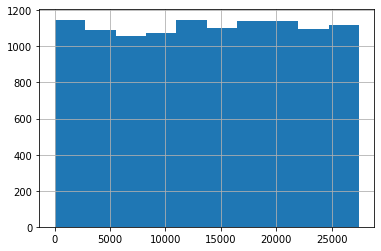

In [74]:
train[train['sentiment']=='neutral']['index'].hist()

In [76]:
train.groupby('sentiment')['whole'].mean()

sentiment
negative    0.102429
neutral     0.533417
positive    0.064787
Name: whole, dtype: float64

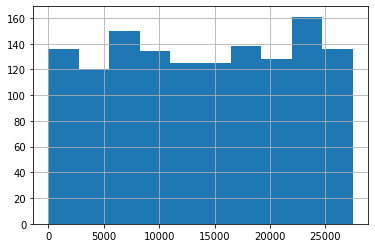

In [77]:
train[train.whole&(train['sentiment']!='neutral')]['index'].hist()

In [78]:
train[train.whole&(train['sentiment']!='neutral')]['index']

17          17
71          71
80          80
92          92
99          99
         ...  
27308    27308
27310    27310
27314    27314
27457    27457
27461    27461
Name: index, Length: 1353, dtype: int64

In [73]:
train[train.whole&(train['sentiment']!='neutral')].sample(n=5)

,index,textID,text,selected_text,sentiment,idx,whole,last_digit,last_id
6457,6457,3c4b0058b3,not eating lunch with my wife like I wanted to,not eating lunch with my wife like I wanted to,negative,258956351667,True,3,3
6192,6192,3985058313,My last full day of even day classes. I`m a li...,My last full day of even day classes. I`m a li...,negative,247044866835,True,3,3
7676,7676,47810d8bde,FacePanda is cool,FacePanda is cool,positive,307107826654,True,14,e
23108,23108,d7f2a33524,ive burned like a ginger kid in the sun. now m...,ive burned like a ginger kid in the sun. now m...,negative,927488750884,True,4,4
5493,5493,32c96c1090,enjoying my new car,enjoying my new car,positive,218127667344,True,0,0


In [51]:
train['last_id'] = train['textID'].str[-1]

In [65]:
train['last_digit'] = train['idx']%16

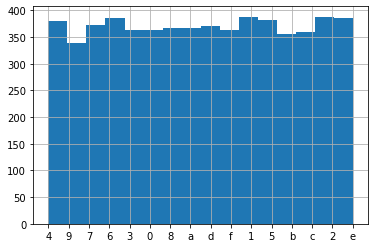

In [83]:
train[train.whole&(train['sentiment']=='neutral')]['last_id'].hist(bins=16)

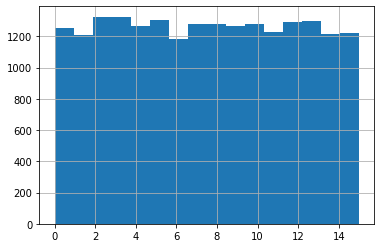

In [80]:
train[~train.whole]['last_digit'].hist(bins=16)

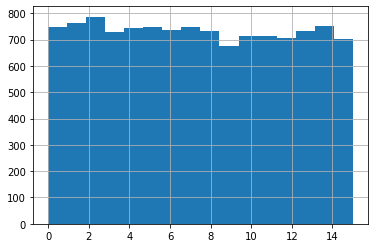

In [70]:
train[train.whole]['last_digit'].hist(bins=16)

In [46]:
train['idx'] = train['textID'].apply(lambda x: int(x, base=16))

In [26]:
train['text'] = train['text'].apply(lambda x: ' '.join(x.strip().split()))
train['selected_text'] = train['selected_text'].apply(lambda x: ' '.join(x.strip().split()))

In [27]:
train['start_pos'] = train.apply(lambda x: x['text'].find(x['selected_text']), axis=1)
train['end_pos'] = train.apply(lambda x: x['start_pos']+len(x['selected_text']), axis=1)

In [28]:
train['start_pos'].describe()

count    27480.000000
mean        15.510153
std         26.048759
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        133.000000
Name: start_pos, dtype: float64

In [47]:
data = []
improve_count = 0
for text, sp, ep, st in zip(train['text'].tolist(), train['start_pos'].tolist(), train['end_pos'].tolist(),
                           train['selected_text'].tolist()):
    split_text = text.split()
    tokens, labels, invert_map, first_token = [], [], [], []
    cur_length = 0
    temp = np.zeros(len(text))
    temp[sp:ep]=1
    for idx, w in enumerate(split_text):
        if sum(temp[cur_length+idx:cur_length+idx+len(w)])>0:
            started = True# space
        else:
            started = False
        for idx2, token in enumerate(tokenizer.tokenize(w)):
            first_token.append(True if idx2==0 else False)
            tokens.append(token)
            invert_map.append(idx)
            if started:
                labels.append(len(tokens)-1)
        cur_length+=len(w)
    start_token_idx = min(labels)
    end_token_idx = max(labels)
    start_word_idx = invert_map[start_token_idx]
    end_word_idx = invert_map[end_token_idx]+1
    assert ' '.join(split_text[start_word_idx:end_word_idx]).find(st)>=0
    if ' '.join(split_text[start_word_idx:end_word_idx])!=st:
        flag=True
        print(' '.join(split_text[start_word_idx:end_word_idx]),'|',st)
    else:
        flag=False
    start_token_idx1, end_token_idx2 = _improve_answer_span(tokens, start_token_idx, end_token_idx,
                                                         tokenizer, ' '+st)
    if start_token_idx1!=start_token_idx or end_token_idx2!=end_token_idx:
        improve_count+=1
#         print(tokens[start_token_idx1:end_token_idx2+1])
    data.append((tokens, start_token_idx1, end_token_idx2, invert_map, tokens[min(labels)],tokens[max(labels)], flag, first_token))

bullying me... | bullying me
gonna | onna
Malaysia...no internet | .no internet
well so much for being unhappy for about 10 minutes. | well so much for being unhappy for about 10 minute
A little happy for | A little happy fo
dont like going | dont like go
and I`m not thrilled at all with mine. | d I`m not thrilled at all with mine.
i lost all my friends, i`m alone and sleepy..i | i lost all my friends, i`m alone and sleepy..
jealous.... | jealous..
He`s awesome... | s awesome
response, sorry guys | , sorry guys
Miles from you I`m in Essex so give me plenty of warning so I can arrive in time to get at least one of those free beers. | Miles from you I`m in Essex so give me plenty of warning so I can arrive in time to get at least one of those free beers
Hi how are you doing ??? *just joined twitter...* | Hi how are you doing ??? *just joined twitter...
my'horrible, | horrible,
sad.. | sad.
totally adore | y adore
painful...but | painful.
be nice | e nice
endearing--because | endearing-
h

I can`t believe I`m | I can`t believe I`
job. this SUCKS. | . this SUCKS
tomorrow AWESOME week all around! | w AWESOME week all around
Me too haha I did but have no credit | Me too haha I did but have no credi
Well good for you...can | l good for you.
its not lettin me vote 4 them | s not lettin me vote 4 them
Great....if | Great..
****. it should be recoverable. | . it should be recoverable.
baitersss hope tonight is fun! | s hope tonight is fun
you can have ice cream, I`ll have kiss. | you can have ice cream, I`ll have kis
IE...it`s expensive!!!! | .it`s expensive!
great weekend | great we
tonight hope it rocked | t hope it rock
equal, so sad | , so sad
superseeded? not good enough | ? not good enough
Happy Mother`s | Happy Mo
point? lovelovelove<3 | t? lovelovelove
May the 4th be with you! | May the 4th be with you
jc, awfully | , awfully
copy & paste **** **** tosser piss flap a 10000000000 times !!!! | copy & paste **** **** tosser piss flap a 10000000000 times !!!
You make me hap

HollowbabesHere comes the utter shite | Here comes the utter shite
coming...I love the classics! | g...I love the classics!
Heading home from Sacramento. Will continue writing the WIndows Server 2008 R2 Unleashed book over the weekend. Sigh #windows | Heading home from Sacramento. Will continue writing the WIndows Server 2008 R2 Unleashed book over the weekend. Sigh #window
reason. Not cool. | . Not cool.
I`m not feeling very inspired today...I | I`m not feeling very inspired today..
good tip..... | good tip.
working sucks big | working sucks bi
That sucks. | t sucks
aw honey... | aw honey.
sad that | sad th
and missed everythin | d missed everythin
well that does make me feel better about staying up even later to watch the daily show. lay on the guilt again. | well that does make me feel better about staying up even later to watch the daily show. lay on the guilt agai
could motivate | uld motiva
I`m really nervous about | I`m really nervous ab
i`m just chilling. | i`m just chilling
th

sucks.... | sucks..
and love | d love
'I`m giving up on you. I don`t care how you mess up your life now.'... | 'I`m giving up on you. I don`t care how you mess up your life now.'
they are very cute, | they are very cute
well....I have a right to be sad | I have a right to be sad
pic made me smile today | c made me smile today
what a wonderful day...i | what a wonderful day..
Haha I like that. | a I like that.
JVM. Too bad! | . Too bad!
Their inability | r inability
Yep, exactly And I`m really sad about this tour...I know I`m gonna cry at my last M&G.... | Yep, exactly And I`m really sad about this tour...I know I`m gonna cry at my last M&G...
disapointed,good | disapointed,g
was hoping | as hopin
soooooo good.....maybe | soooooo good..
4 i feel like a complete tool | 4 i feel like a complete too
are fantastic. | e fantastic
good | goo
instead.' You poor buggers | ' You poor bugg
More to thank for #ff shouts and heaps more. Sry will be here all night i now realise | More to thank for #f

Coffee...Not a so Healthy | Not a so Healthy
hayfever has struck..thought | hayfever has struck..
dub' wow | ' wow
song is great!!! | song is great!
awesome!was | awesome!wa
cool, | cool
- Welcome | - Welcom
the best | e best
Yay! Unpacked | Yay! Un
oh dear. that is terrible. | oh dear. that is terrible
Recipes. Sorries! | . Sorrie
I hate moving; and hate packing even more.. | I hate moving; and hate packing even more
i dont think i`ve cried so hard for a show..Finally | i dont think i`ve cried so hard for a show..
Yessss august 2nd will be a blast | s august 2nd will be a blast
I`m sooo HAPPY Demi`s | I`m sooo HAPPY De
plaster, im going to bleed to death | , im going to bleed to death
it`s not too bad, | s not too bad
shopping...fantastic | fantastic
more HATERS!!!! | e HATERS
kelli, you`re a bad sister. | , you`re a bad sister.
utterly digusted with | utterly digusted wi
is buttfuck stupid. | is buttfuck stupid
why we canï¿½t | why we canï
Im kinda bored anyone else I think ill liste

be nice | e nice
ps it`s | ps it
often, seriously The crazier the topic, the better. | , seriously The crazier the topic, the better
haha funny cause i blame and for me not going to bed its a vicious circle | haha funny cause i blame and for me not going to bed its a vicious circl
me smh | e smh
woo hoo its | woo hoo it
Happy mothers day to everyone | Happy mothers day to everyon
save even | save ev
me??? Too busy | ? Too busy
sick dont | ick dont
Good night. Sorry I missed you during our morning window. See you at 5, I suspect. | Good night. Sorry I missed you during our morning window. See you at 5, I suspect
Nooo...i forgot my calculator for physics | i forgot my calculator for physics
really good | ly goo
@ i missed the party!!!! i bought wine and everything!!! | @ i missed the party!!!! i bought wine and everything!
soo sad. | o sad
know. it sucks | . it sucks
i hate the bus...any | i hate the bus..
_c Thank | c Thank
Great meeting...lunch | Great meeting..
youre lucky | e lucky
H

I just don`t feel right anymore... | I just don`t feel right anymore..
hard!!! | hard!!
Boo! You always leave me behind | ! You always leave me behind
day...stay positive twitterbugs...goodnight! | .stay positive twitterbugs...goodnight!
Wtf?! | Wtf?
Im crying.... | Im crying..
do great | o great
'Thank You!!'. | 'Thank You!
hate not | hate no
LOL! Girl that video disturbed me and I love the hk theme too cute! | LOL! Girl that video disturbed me and I love the hk theme too cute
you. Pleasant surprise | . Pleasant surprise
'somebody calls you, and you answer quite slowly, a girl with kaleidoscope eyes' yeah, im normal. | 'somebody calls you, and you answer quite slowly, a girl with kaleidoscope eyes' yeah, im norma
and good luck | nd good luck
I still have nightmares about this game FU KC! | I still have nightmares about this game FU KC
It`s good isn`****! Our | It`s good isn`****! Ou
ha! nice. that`s about all the german you`re gonna get from me. after that, it`s just counting and jibb

bad...sorry | bad..
Boooooooo! I`m totally bored! | ! I`m totally bored!
this sux but | this sux bu
weekend. nyt life sux | nd. nyt life sux
them. great stuff AND Florence and The Machine. Great, great music | . great stuff AND Florence and The Machine. Great, great music
the worst | e worst
Death sucks! | h sucks
is envious of people not | is envious of people no
zzzzzzz.......Goodnight Tweets. | ..Goodnight Tweets.
TSX is nice just cuz it`s a new car- handles nice but doesn`t have the horses of the TL-S | X is nice just cuz it`s a new car- handles nice but doesn`t have the horses of the TL-S
Darnit. See what happens when I avoid teh interwebs for work. | Darnit. See what happens when I avoid teh interwebs for wor
Server...nice. | nice.
really nice | y nice
tonite..Happy | Happy
and thanks | nd thank
popcorn....now I feel sick. | now I feel sick.
Now that sucks... | Now that sucks.
have a good night twitts.! | have a good night twitts.
Missing NYC | Missing NY
I miss all you OK girls.

and fun | d fun
thanks. Glad | s. Glad
am so grateful for ur music. | m so grateful for ur music
the best | he bes
so awesome! | o awesome
Chennai heat | i heat
My pleasure. Hear Kelli has new project! | My pleasure. Hear Kelli has new project
I tried...) | I tried
i know... | i know.
wtf.....winter | wtf.
Have you seen Wolverine? Might want to change that pic. There`s a new sheriff in town. | Have you seen Wolverine? Might want to change that pic. There`s a new sheriff in town
works fine. | s fine
Wish I had tickets | Wish I had ti
wii remote dead.. no multiplayer here tonight | i remote dead.. no multiplayer here tonight
likes the reports from | likes the reports fr
== me dead on sofa the whole evening | = me dead on sofa the whole evening
JoeMo...it just won`t be the same! Travel safely ...we`ll see you tomorrow! | it just won`t be the same! Travel safely ...we`ll see you tomorrow!
but hopefully | t hopefully
mentalities.There is another one which takes the piss of arabs, | .There i

shoot...hope | ..hope
would love to catch up with you. | would love to catch up with yo
Always relaxing....... | s relaxing
still miss | ll mis
omg i just slept like 18hrs in the last 22hrs... i think i`m dying or something reminds me of catcher | omg i just slept like 18hrs in the last 22hrs... i think i`m dying or something reminds me of catche
Morning, hope | , hope
me sickee | e sickee
bullet train from tokyo the gf and i have been visiting japan since thursday vacation/sightseeing gaijin godzilla | bullet train from tokyo the gf and i have been visiting japan since thursday vacation/sightseeing gaijin go
trigger. Oh I`m so happy. | . Oh I`m so happ
(sorry. | sorry.
ahhh ikr! he`s the cuteset thing ever Plus it reminds me of twilight which is good cause I looooooove it so much!! | ahhh ikr! he`s the cuteset thing ever Plus it reminds me of twilight which is good cause I looooooove it so much!
unfortunately... | unfortunately.
lately. Glad you mentioned it last night, watched it aga

awwww......i`m sorry | m sorry
I`m feeling sick yuck!!! | I`m feeling sick yuck!
is better | s better
know I love Robert Pattinson!! | w I love Robert Pattinson!!
got an email from my auntie bout fathers day... mothers day w/seven moms but fathers day will consist of 2 dads #realitycheck | got an email from my auntie bout fathers day... mothers day w/seven moms but fathers day will consist of 2 dads #realitychec
good morning/brunch-ish | good morning/b
I wish I could go to E3. Oh well.... | I wish I could go to E3. Oh well...
Jenna. Hope all is well Just thinking of you and wishing you the best! Lots of love from over here in New York!!! | . Hope all is well Just thinking of you and wishing you the best! Lots of love from over here in New York
here... thanks | .. thanks
and humbug. | d humbug.
boo...I | boo.
off! so sad | ! so sa
i hate history | i hate hi
misses my cousins so badly!!! | misses my cousins so badly!!
wish me luck..... | wish me luck.
Bunny | unny
and it`s so hard | nd i

me, just drank too much. | , just drank too much.
aww bless you guys are so cute.. | aww bless you guys are so cute
AMAZING!! | AMAZING!
wondering!..I love | I love
MIA, i know bad me | , i know bad me
day...it was miserable! No twitter or email at my beck and call, truly awful | it was miserable! No twitter or email at my beck and call, truly awful
gives me a much better result (but | gives me a much better result (b
you`re right...I | you`re right.
He still doesn`t love me... | He still doesn`t love me..
today! So BEAUTIFUL!! You looked so good! Glad to see the wonderful turnout! | ! So BEAUTIFUL!! You looked so good! Glad to see the wonderful turnout!
exams....boring | boring
(the kids are great!). | (the kids are great!)
haha..i | haha.
knew I was kidding. | w I was kidding.
fault.... | fault.
unfortunately!!!! | unfortunately!
whining about | whining ab
have funnnn | ve funnn
humane penalty | e penalty
clothes..house work blues | house work blues
I`m afraid not much I just realize

desperate,that | desperate,t
good day... | good day..
<-----bored to death | bored to death
I`m sunburnt arms are itching. | I`m sunburnt arms are itching
quickly, sorry! | , sorry
that`s awesome! | s awesome!
'Friends | Friends
looks good | s good
Mother`s Day present...a | Mother`s Day present..
were fab | e fab
_lu Just one part of a very odd trip. You travel for 3 months you see some weirdness. Loved Perth though | lu Just one part of a very odd trip. You travel for 3 months you see some weirdness. Loved Perth though
I`m suffering | m suffering
is... WE make old look GOOD! | .. WE make old look GOOD
Gogol Bordello < par. Prolly not even in the top 10 of GB shows I`ve seen. Perhaps some old fashioned Civilization II will help? | Gogol Bordello < par. Prolly not even in the top 10 of GB shows I`ve seen. Perhaps some old fashioned Civilization II will hel
movie...loved it | ..loved it
bad... | bad..
not cool... | not cool.
Its Good | s Good
i believe.. | i believe
are great! | e great

Finished dexter season2 start on season 3 next week? | Finished dexter season2 start on season 3 next week
YOU`RE FAKING | E FAKING
fun!!!! | fun!
was so good | s so good
that! Nice | ! Nic
Pretty quiet so far. Prob | Pretty quiet so far. Pr
hour....so not fair..... | so not fair....
Ugh! I can`t access | Ugh! I can`t ac
Looking forward for | Looking forward fo
BUMMER!!!!IENJOYED | BUMMER!!
----> almost better than the | -> almost better than th
Grandmother...miss her mane um sad | miss her mane um sad
happy mothers | happy mo
have an amazing time...and | have an amazing time.
last #ff _Diesel _Web_Design | last #ff _Diesel _Web_Desig
aww i know its my addiction! awww i know sameee ! its just more more more | aww i know its my addiction! awww i know sameee ! its just more more mor
#HappyMothersDay | HappyMothersDay
today lol, look like the load isnt so bad. | y lol, look like the load isnt so bad.
will...not good | not good
Tom, thats really cute. i love you guys | , thats really cute.

Just saw a male Baltimore oriole at our suet feeder and something enjoyed a lot of thistle from our new thistle feeder early this a.m. | ust saw a male Baltimore oriole at our suet feeder and something enjoyed a lot of thistle from our new thistle feeder early this a.m.
familiar.....sorry | .sorry
me! never mind | ! never mind
all good. | l good
concert...I Love him! Thanks Bob | .I Love him! Thanks Bob
hate different | hate di
the best | e best
me love | e love
Proudly watching | Proudly wa
why you not go on the twitters no more? oh bais! | why you not go on the twitters no more? oh bais
We`re idiots. | re idiot
much hopeful | h hopeful
It`s freakin` hot and humid today. | t`s freakin` hot and humid today.
Awesome...love top gear..whos | love top gear..
and this one had been a fave for a longgggg time... | d this one had been a fave for a longgggg time
luvvv it- but one aquestion-why isn`t there any full moon crazy tour date for toronto!?!?!?!!??! | luvvv it- but one aquestion-why isn

all good | l good
ooo thanks for the danger radio link loves it...how | ooo thanks for the danger radio link loves it..
light?!?!?! | ht?
again...save | save
of miss | of mis
so unfair, | o unfair
weekend standby duty?????????????????????????????????????????????????? | weekend standby duty??
Lodge.This is not what I thought will eventually happen in my 6th grade Awww...bad, bad | This is not what I thought will eventually happen in my 6th grade Awww...bad, bad
frustration.I | frustration.
(`Hurrah!` | Hurrah!`
jealous...see | jealous.
I remember the show... I don`t remember the hiccups... | I remember the show... I don`t remember the hiccups.
was soooo great!!! | s soooo great!!!
sleep....good | good
we love so much. | e love so much.
still love | l love
dunno why im just not in the best of moods... | dunno why im just not in the best of moods..
yeah, Belinda Jensen was really good | h, Belinda Jensen was really goo
follow sweetie....tweethug 4 ya | w sweetie....tweethug 4 ya
Newt...ho

DAYS YOU NEED TO WIN | S YOU NEED TO WIN
So funny | o funny
were sad | e sad
I`m an incredibly happy person with 100% energy. Love to dance & laugh...the | I`m an incredibly happy person with 100% energy. Love to dance & laugh...t
twitter! i hate that song | r! i hate that son
May..lol..im greeting in advance! haha | .im greeting in advance! haha
enjoying life partying tonight.....maybe? | enjoying life partying tonight.
Very excited | y excited
was suggesting | s suggesting
said it was 2 late | d it was 2 late
im smiling... | m smiling
(demo) aero wheels. Louder, but they cut like a knife. U will hear me coming, passing on your left | ) aero wheels. Louder, but they cut like a knife. U will hear me coming, passing on your left
SUCKS!!! | SUCKS!!
my amazing mother... | y amazing mother.
this beautiful | s beautiful
****.....and | ****..
its ridiculous, and my Saturday is going to suck with | its ridiculous, and my Saturday is going to suck wi
cute... | cute..
I don`t know how to quit y

my allergies kick | y allergies kick
hope you have a great day tomorrow!! | hope you have a great day tomorrow!
OHH yeah i sometimes forget your in the other but cheek ok america | OHH yeah i sometimes forget your in the other but cheek ok americ
RIOT!! | RIOT!
know... I don`t want to be left in our home by myself | . I don`t want to be left in our home by myself
for joy! | r joy!
yes........there are many cool | ...there are many cool
and thanks | d thanks
lucky girl!!! | lucky girl!!
`01. we were the final stage guinea pigs it seriously is a waste of time. | . we were the final stage guinea pigs it seriously is a waste of tim
dude i am so sorry!!!!! | dude i am so sorry!
guys! love ya | ! love ya
JBobsessed xD I miss them soooooo much! | obsessed xD I miss them soooooo much!
...OOOPS AGAIN, | OOOPS AGAIN,
feeling nice... | feeling nice..
all good... | l good
dive..a bit scary sometimes but fun. | .a bit scary sometimes but fun.
cuts. Very sad | . Very sad
go..have a great Mom`s Day |

Disney...best | best
girls love | ls lo
do stupid | o stupid
**** comes home & is going to make a mess of it...my | **** comes home & is going to make a mess of it..
**** beautifuul!!! | **** beautifuul!
I`m so sorry!...my | I`m so sorry!.
away sadfaced. | y sadfaced
tasted GREAT! | d GREAT
grumble..weather | grumble..
tweets don`t paint a good picture | s don`t paint a good picture
Forget completely abt uploading the assignemtn. Only remmebered cos of ur twit. | Forget completely abt uploading the assignemtn. Only remmebered cos of ur twit
Good night Twitter | Good night Tw
Woot! lol It`s gonna be hard to send this one back | Woot! lol It`s gonna be hard to send this one ba
felt bad for the guy. haha im good i miss you guys! | felt bad for the guy. haha im good i miss you guys
stress. The detalis can get a bit gruesome | . The detalis can get a bit gruesome
very forgiving. | y forgiving
is so amusing. | s so amusing.
poor Stuart... I was wondering | poor Stuart... I was wonde
Whn r u 

In [48]:
improve_count

1565

In [49]:
tokenizer.tokenize("bullying me...")

['bullying', 'me', '.', '.', '.']

In [50]:
tokens, start, end, invert_map, _, _, not_match, first_token = zip(*data)

In [51]:
len(tokens)

27480

In [52]:
train['tokens'] = tokens

In [53]:
train['start'] = start
train['end'] = end
train['invert_map'] = invert_map
train['first_token'] = first_token

In [54]:
senti2label = {
    'positive':2,
    'negative':0,
    'neutral':1
}
train['senti_label']=train['sentiment'].apply(lambda x: senti2label[x])

In [55]:
train.reset_index(drop=True, inplace=True)

In [56]:
train.head()

,textID,text,selected_text,sentiment,start_pos,end_pos,tokens,start,end,invert_map,senti_label,fold,first_token
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0,35,"[i, `, d, have, responded, ,, if, i, were, going]",0,9,"[0, 0, 0, 1, 2, 2, 3, 4, 5, 6]",1,0,"[True, False, False, True, True, False, True, ..."
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0,8,"[soo, ##o, sad, i, will, miss, you, here, in, ...",0,2,"[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9]",0,0,"[True, False, True, True, True, True, True, Tr..."
2,088c60f138,my boss is bullying me...,bullying me,negative,11,22,"[my, boss, is, bullying, me, ., ., .]",3,4,"[0, 1, 2, 3, 4, 4, 4, 4]",0,0,"[True, True, True, True, True, False, False, F..."
3,9642c003ef,what interview! leave me alone,leave me alone,negative,16,30,"[what, interview, !, leave, me, alone]",3,5,"[0, 1, 1, 2, 3, 4]",0,0,"[True, True, False, True, True, True]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on th...","Sons of ****,",negative,0,13,"[sons, of, *, *, *, *, ,, why, couldn, `, t, t...",0,6,"[0, 1, 2, 2, 2, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, ...",0,0,"[True, True, True, False, False, False, False,..."


In [62]:
tokens_len = train['tokens'].apply(lambda x: len(x))

In [63]:
max(tokens_len)

108

In [57]:
from sklearn.model_selection import StratifiedKFold

In [58]:
kf = StratifiedKFold(n_splits=5)

In [59]:
train['fold'] = 0
for fold, (train_idx, valid_idx) in enumerate(kf.split(train, train['senti_label'])):
    train.loc[valid_idx, 'fold'] = fold

In [60]:
train['fold'].value_counts()

0    5498
1    5497
4    5495
3    5495
2    5495
Name: fold, dtype: int64

In [61]:
train.to_pickle('../input/train.pkl')